## Importing relevant library for cleaning

In [52]:
import pandas as pd

In [2]:
extracted_data = pd.read_csv('Credit Score Classification Dataset.csv')

In [3]:
extracted_data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [4]:
extracted_data.columns = extracted_data.columns.str.replace(' ' , '_' )

In [5]:
extracted_data.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital_Status        0
Number_of_Children    0
Home_Ownership        0
Credit_Score          0
dtype: int64

In [6]:
extracted_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number_of_Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [7]:
extracted_data.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital_Status        object
Number_of_Children     int64
Home_Ownership        object
Credit_Score          object
dtype: object

In [8]:
median_age = extracted_data['Age'].median()

def map_median_age(age):
    if age > median_age:
        return 0
    else:
        return 1
    
extracted_data['Age'] = extracted_data['Age'].apply(map_median_age)

In [9]:
gender_mapped = {'Female' : 0 ,
                 'Male' : 1}

extracted_data['Gender'] = extracted_data['Gender'].map(gender_mapped)

In [10]:
income_median = extracted_data['Income'].median()
extracted_data['Income'] = extracted_data['Income'].apply(lambda x:0 if x > income_median else 1)

In [11]:

degree_mapping ={'High School Diploma': 0 ,
     "Associate's Degree": 1 ,
     "Bachelor's Degree": 2 ,
     "Master's Degree": 3}
    
extracted_data['Education'] = extracted_data['Education'].map(degree_mapping)

In [12]:
Marital_Status_mapped = {'Single' : 0 ,
                 'Married' : 1}

extracted_data['Marital_Status'] = extracted_data['Marital_Status'].map(Marital_Status_mapped)

In [13]:
Number_of_Children_Median = extracted_data['Number_of_Children'].median()
extracted_data['Number_of_Children'] = extracted_data['Number_of_Children'].apply(lambda x: 0 if x > Number_of_Children_Median else 1)

In [14]:
Home_Ownership_mapped = {'Rented' : 0 ,
                 'Owned' : 1}

extracted_data['Home_Ownership'] = extracted_data['Home_Ownership'].map(Home_Ownership_mapped)

In [15]:
Credit_Score_mapped  = {'low' : int(0) ,
                        'Average' : int(1) ,
                        'High' : int(2) }

extracted_data['Credit_Score'] = extracted_data['Credit_Score'].map(Credit_Score_mapped)

In [16]:
extracted_data.head()

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score
0,1,0,1,2.0,0,1,0,2.0
1,1,1,0,3.0,1,0,1,2.0
2,1,0,1,NaN,1,0,1,2.0
3,0,1,0,0.0,0,1,1,2.0
4,0,0,0,2.0,1,0,1,2.0
...,...,...,...,...,...,...,...,...
159,1,0,1,0.0,0,1,0,NaN
160,1,1,1,1.0,0,1,0,1.0
161,0,0,1,2.0,1,0,1,2.0
162,0,1,0,3.0,0,1,1,2.0


In [17]:
extracted_data.isnull().sum()

Age                    0
Gender                 0
Income                 0
Education             31
Marital_Status         0
Number_of_Children     0
Home_Ownership         0
Credit_Score          15
dtype: int64

In [18]:
clean_data = extracted_data.dropna(how ='any')

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
clean_data['Education'] = clean_data['Education'].astype(int)
clean_data['Credit_Score'] = clean_data['Credit_Score'].astype(int)

In [21]:
clean_data.head()

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score
0,1,0,1,2,0,1,0,2
1,1,1,0,3,1,0,1,2
3,0,1,0,0,0,1,1,2
4,0,0,0,2,1,0,1,2
5,0,1,0,3,1,1,1,2


In [22]:
#pip install scikit-learn

In [23]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [24]:
kmeans = KMeans(n_clusters = 5 , random_state=42)
kmeans.fit(clean_data)
clusters = kmeans.labels_

In [25]:
KMeans_Model_Data = clean_data

## Elbow Method

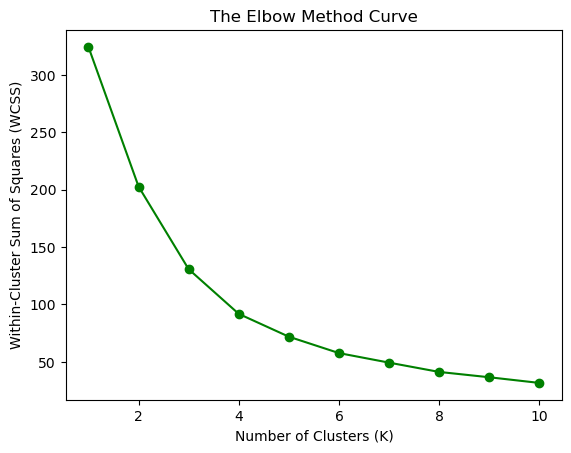

In [26]:
k_values= range(1,11)
wcss = [KMeans(n_clusters = k , random_state = 42).fit(KMeans_Model_Data).inertia_ for k in k_values]
plt.plot(k_values , wcss , 'bo-' , color = 'green' , marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method Curve')
plt.show()

## Analyzing Cluster Centroids

<Figure size 1000x600 with 0 Axes>

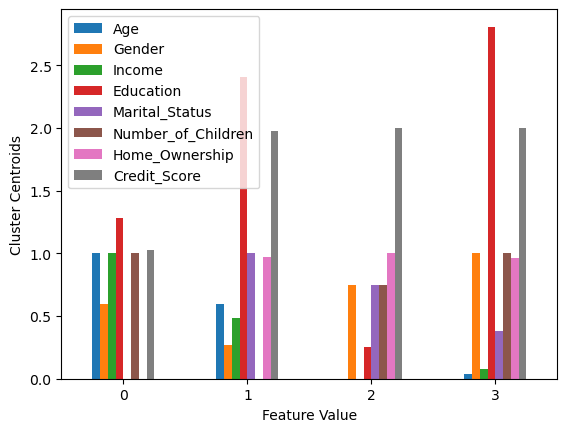

In [27]:
k = 4
kmeans = KMeans(n_clusters=k , random_state = 42 )
kmeans.fit(KMeans_Model_Data)

cluster_centroids = kmeans.cluster_centers_
        
centroid_data = pd.DataFrame(cluster_centroids , columns = KMeans_Model_Data.columns)

plt.figure(figsize=(10,6))
centroid_data.plot(kind='bar')
plt.xlabel('Feature Value')
plt.ylabel('Cluster Centroids')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Visualizing Clusters

### *Importing Visualizing Libraries*

In [28]:
# import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
KMeans_Model_Data['Cluster'] = clusters


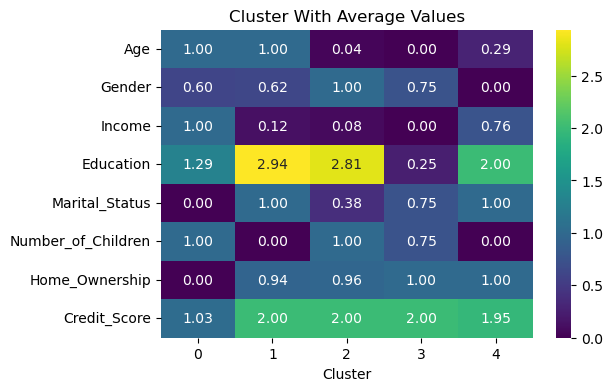

In [30]:
KMeans_Model_Data_Clusters = KMeans_Model_Data.copy()
attributes = ['Age','Gender', 'Income','Education','Marital_Status','Number_of_Children','Home_Ownership','Credit_Score']
KMeans_Model_Data_Clusters['Cluster'] = clusters
cluster_avg = KMeans_Model_Data_Clusters.groupby('Cluster').mean()
plt.figure(figsize = (6 , 4))

sns.heatmap(cluster_avg.T, cmap='viridis', annot=True , fmt = '.2f' )
plt.title('Cluster With Average Values')
plt.xlabel('Cluster')
plt.yticks(rotation=0)
plt.show()

## Customer Segmentation

In [31]:
kmeans.fit(KMeans_Model_Data_Clusters[attributes])
cluster_labels = kmeans.labels_
KMeans_Model_Data_Clusters['Cluster'] = cluster_labels
KMeans_Model_Data_Clusters.head()


,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score,Cluster
0,1,0,1,2,0,1,0,2,0
1,1,1,0,3,1,0,1,2,1
3,0,1,0,0,0,1,1,2,2
4,0,0,0,2,1,0,1,2,1
5,0,1,0,3,1,1,1,2,3


## Customer Profiling

In [32]:
cluster_profiles = KMeans_Model_Data_Clusters.groupby('Cluster')[attributes].mean()
cluster_profiles

,Age,Gender,Income,Education,Marital_Status,Number_of_Children,Home_Ownership,Credit_Score
Cluster,,,,,,,,
0,1.000000,0.60000,1.000000,1.285714,0.000000,1.00,0.000000,1.028571
1,0.594595,0.27027,0.486486,2.405405,1.000000,0.00,0.972973,1.972973
2,0.000000,0.75000,0.000000,0.250000,0.750000,0.75,1.000000,2.000000
3,0.038462,1.00000,0.076923,2.807692,0.384615,1.00,0.961538,2.000000


## Training & Testing

In [33]:
from sklearn.model_selection import train_test_split
Credit_Data = KMeans_Model_Data_Clusters
x = Credit_Data[attributes]
y = Credit_Data['Cluster']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=20 , random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
Random_Forest_Model = RandomForestClassifier(random_state = 42)


Random_Forest_Model.fit(x_train , y_train)
training_accuracy = Random_Forest_Model.score(x_train,y_train)
conversion_percentage = int(training_accuracy * 100)
print(f"Training Accuracy: {conversion_percentage}%")


y_pred = Random_Forest_Model.predict(x_test)
accuracy =  accuracy_score(y_test , y_pred)
conversion_percentage_form = int(accuracy * 100)
print(f"Testing Accuracy :{conversion_percentage_form:}%")

Training Accuracy: 100%
Testing Accuracy :96%


In [36]:
from sklearn.metrics import confusion_matrix

Confusion Matrix:
[[13  0  0  0]
 [ 0  9  0  0]
 [ 0  0  1  0]
 [ 1  0  0  6]]


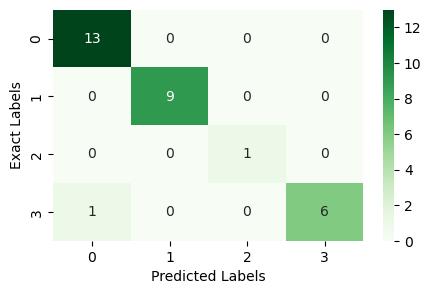

In [37]:
cm = confusion_matrix(y_test , y_pred)
print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(5 , 3))      
sns.heatmap(data = cm , annot=True , cmap='Greens') 
plt.xlabel('Predicted Labels')
plt.ylabel('Exact Labels')
plt.show()

In [46]:
Credit_Model = Random_Forest_Model

## *Lebogang Francis Sindani*